In [56]:
import torch    
import json 
from ptlpinns.models import model, transfer
from ptlpinns.perturbation import LPM, standard
from ptlpinns.odes import forcing, numerical, equations
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.integrate import cumulative_trapezoid

### Load model

In [57]:
overdamped_path = "/home/dda24/PTL-PINNs/ptlpinns/models/train/overdamped_k14"
overdamped_name = "model_overdamped_k14.pth"
overdamped_model, training_log = model.load_model(overdamped_path, overdamped_name)

14 True False False [128, 128, 256]


### Problem definition

In [58]:
N = 5120
t_span = (0, 20)
t_eval = np.linspace(t_span[0], t_span[1], N)

### Compute latent representations

In [59]:
H_dict = transfer.compute_H_dict(overdamped_model, N=N, bias=True, t_span=t_span)

### Transfer parameters

In [60]:
w_list_transfer = [1, 1, 1, 1, 1]
zeta_list = [5, 10, 30, 40, 60]

#forcing_freq = [[1]]
#forcing_coef = [[1]]

def forcing(numpy=False):
    if not numpy:
        def force(t):
            return torch.stack((torch.zeros_like(t), torch.cos(t)), dim=1)
    else:
        def force(t):
            return np.stack((np.zeros_like(t), np.cos(t)), axis=1)
    return force


forcing_list = [forcing(True), forcing(True), forcing(True), forcing(True), forcing(True)]

forcing_1D = lambda t: np.cos(t)
ic_list = [[1, 0], [1, 0], [1, 0], [1, 0], [1, 0]]
epsilon_list = [2, 2, 2, 2, 2]
p_list = [9]
q = 3

### Numerical solver

In [61]:
numerical_undamped_duffing_list = []

for zeta in zeta_list:
    ode = equations.ode_oscillator_1D(w_0=w_list_transfer[0], zeta=zeta, forcing_1D=forcing_1D, q=q, epsilon=epsilon_list[0])
    numerical_undamped_duffing_list.append(numerical.solve_ode_equation(ode, (t_eval[0], t_eval[-1]), t_eval, ic_list[0]))

### PINN

In [62]:
NN_TL_solution, perturbation_solution, _ = transfer.compute_perturbation_solution(w_list_transfer, zeta_list, epsilon_list, p_list, ic_list, forcing_list, H_dict, t_eval, training_log, all_p=True, comp_time=False, solver="standard", power=q)
NN_TL_solution = NN_TL_solution.squeeze()

In [63]:
NN_TL_solution.shape

(5120, 5, 2)

In [64]:
PINN_solution = []

for perturbation_zeta in perturbation_solution:

    perturbation = []
    for perturbation_order in perturbation_zeta:

        perturbation.append(perturbation_order[:, 0])

    PINN_solution.append(standard.calculate_general_series(perturbation, epsilon_list[0]))

zeta: 5, order: 0, mean error absolute: 0.1699040506914834
zeta: 5, order: 1, mean error absolute: 0.1342040613246369
zeta: 5, order: 2, mean error absolute: 0.21649962114615148
zeta: 5, order: 3, mean error absolute: 0.25665314195312794
zeta: 5, order: 4, mean error absolute: 0.4627204034895026
zeta: 5, order: 5, mean error absolute: 0.6938564686046069
zeta: 5, order: 6, mean error absolute: 1.239006389659296
zeta: 5, order: 7, mean error absolute: 2.084962319741544
zeta: 5, order: 8, mean error absolute: 3.760624196066485


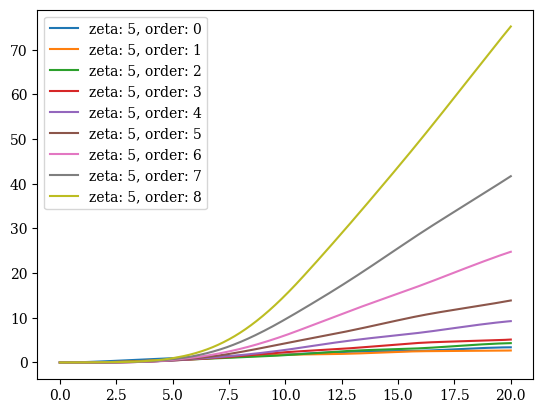

zeta: 10, order: 0, mean error absolute: 0.19092222306344295
zeta: 10, order: 1, mean error absolute: 0.13068298489702926
zeta: 10, order: 2, mean error absolute: 0.17067691182877534
zeta: 10, order: 3, mean error absolute: 0.17400195131565668
zeta: 10, order: 4, mean error absolute: 0.2650675178753905
zeta: 10, order: 5, mean error absolute: 0.33515994929763615
zeta: 10, order: 6, mean error absolute: 0.528482729290588
zeta: 10, order: 7, mean error absolute: 0.7630677581420848
zeta: 10, order: 8, mean error absolute: 1.229388734994308


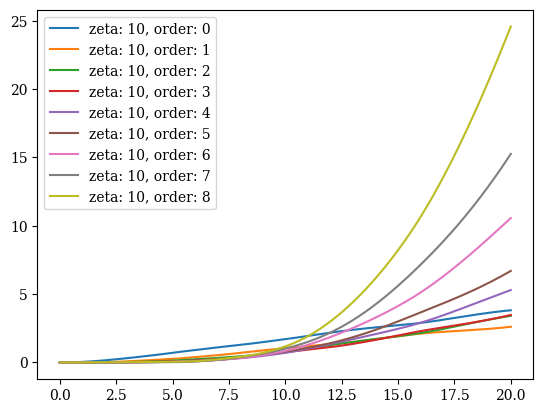

zeta: 30, order: 0, mean error absolute: 0.14919333351787245
zeta: 30, order: 1, mean error absolute: 0.0674041179654276
zeta: 30, order: 2, mean error absolute: 0.04372554216539527
zeta: 30, order: 3, mean error absolute: 0.031017330948420203
zeta: 30, order: 4, mean error absolute: 0.027346220488529686
zeta: 30, order: 5, mean error absolute: 0.02350795395081054
zeta: 30, order: 6, mean error absolute: 0.022947597860990748
zeta: 30, order: 7, mean error absolute: 0.021604024895668948
zeta: 30, order: 8, mean error absolute: 0.022220228091185113


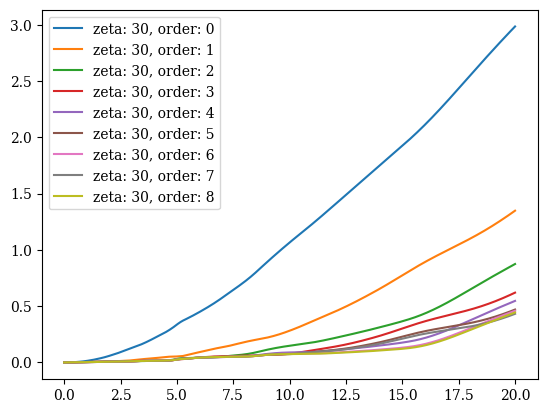

zeta: 40, order: 0, mean error absolute: 0.13018875065394508
zeta: 40, order: 1, mean error absolute: 0.05027338203327188
zeta: 40, order: 2, mean error absolute: 0.026723575893564878
zeta: 40, order: 3, mean error absolute: 0.01853719386832946
zeta: 40, order: 4, mean error absolute: 0.013470913500155623
zeta: 40, order: 5, mean error absolute: 0.011844754931147172
zeta: 40, order: 6, mean error absolute: 0.01098194693702223
zeta: 40, order: 7, mean error absolute: 0.00962881213688895
zeta: 40, order: 8, mean error absolute: 0.010321806941973117


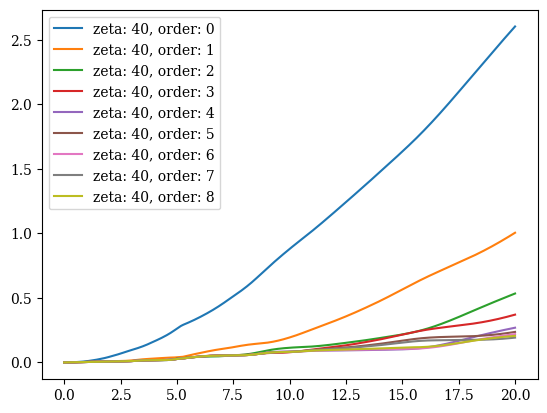

zeta: 60, order: 0, mean error absolute: 0.10343229757322678
zeta: 60, order: 1, mean error absolute: 0.031083855540668358
zeta: 60, order: 2, mean error absolute: 0.013655512825255128
zeta: 60, order: 3, mean error absolute: 0.009862610128161345
zeta: 60, order: 4, mean error absolute: 0.008870980182640854
zeta: 60, order: 5, mean error absolute: 0.008087657477734713
zeta: 60, order: 6, mean error absolute: 0.008433323736379922
zeta: 60, order: 7, mean error absolute: 0.008121811992662886
zeta: 60, order: 8, mean error absolute: 0.00829930399780815


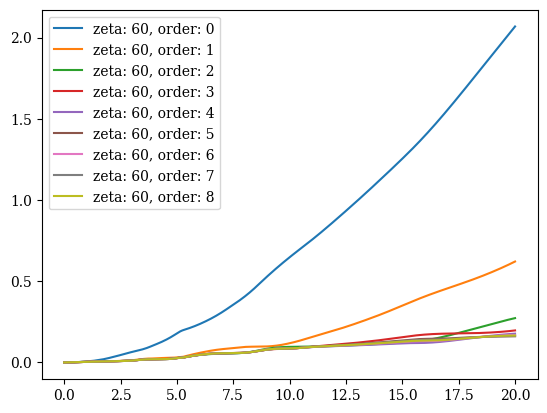

In [65]:
for i in range(len(PINN_solution)):

    for k in range(p_list[0]):

        error = np.abs(numerical_undamped_duffing_list[i][0, :] - PINN_solution[i][k])
        print(f"zeta: {zeta_list[i]}, order: {k}, mean error absolute: {np.mean(error)}")
        cumulative_error = cumulative_trapezoid(error, t_eval, initial=0) 
        plt.plot(t_eval, cumulative_error, label=f"zeta: {zeta_list[i]}, order: {k}")

    plt.legend()
    plt.show()

zeta: 5, mean Error: 6.705e+00
zeta: 10, mean Error: 1.922e+00
zeta: 30, mean Error: 2.191e-02
zeta: 40, mean Error: 9.064e-03
zeta: 60, mean Error: 8.173e-03


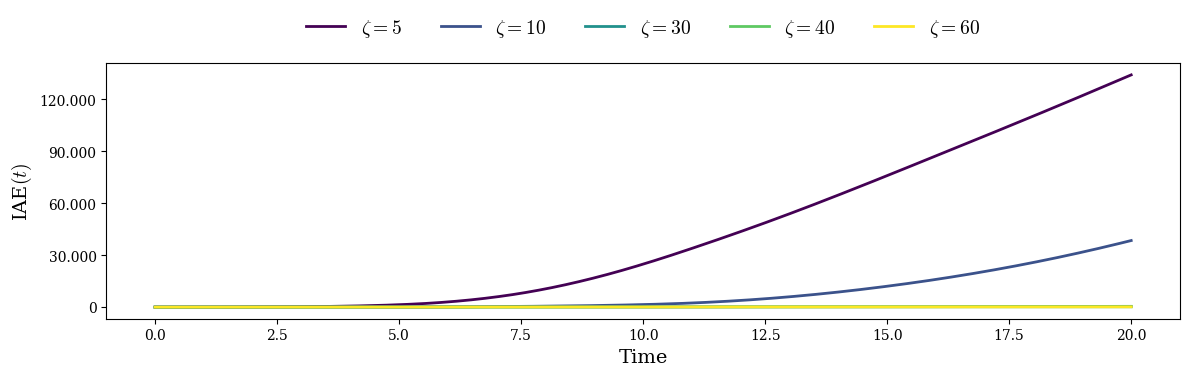

In [66]:
standard.plot_IAE_multiple_zeta(zeta_list, t_eval, NN_TL_solution, numerical_undamped_duffing_list)